In [11]:
%pip install pulp

     --------------------------------------- 14.3/14.3 MB 29.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
%pip install haversine

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import pulp
from haversine import haversine, Unit

In [2]:
df = pd.read_csv('gifts.csv')
df

,GiftId,Latitude,Longitude,Weight
0,1,16.345769,6.303545,1.000000
1,2,12.494749,28.626396,15.524480
2,3,27.794615,60.032495,8.058499
3,4,44.426992,110.114216,1.000000
4,5,-69.854088,87.946878,25.088892
...,...,...,...,...
99995,99996,-86.087115,-19.991474,10.927676
99996,99997,40.259124,-110.689749,9.347134
99997,99998,42.393016,0.011825,1.000000
99998,99999,-75.919193,-10.193532,1.000000


In [41]:
latitude = df["Latitude"].values.tolist()
longitude = df["Longitude"].values.tolist()

vectors = list(zip(latitude,longitude))


In [3]:
sorted_weight = df.sort_values(by=['Weight'],ascending=False)
sorted_weight


,GiftId,Latitude,Longitude,Weight
55047,55048,23.397175,4.031402,50.0
2719,2720,46.876776,106.222900,50.0
18504,18505,49.968062,-117.730307,50.0
18486,18487,-83.954576,-109.983391,50.0
55775,55776,48.445299,-66.885909,50.0
...,...,...,...,...
50222,50223,26.594148,58.861875,1.0
50223,50224,-80.385086,78.306156,1.0
50232,50233,-82.471792,66.555327,1.0
50236,50237,57.536951,79.390440,1.0


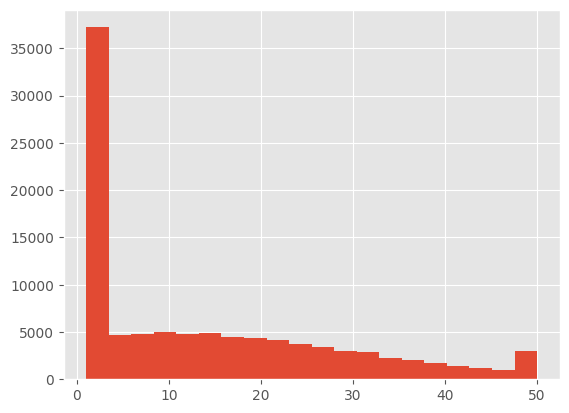

In [9]:
x = sorted_weight["Weight"]
plt.style.use('ggplot')
plt.hist(x, bins=20)
plt.show()

In [38]:
def findNext(startPoint,points):
        
    bestDistance = float('inf')
    for point in points:
        distance = haversine((startPoint[0],startPoint[1]),(point[0],point[1]))
        
        if distance < bestDistance:
            bestDistance = distance
            nextpoint = point
    
    return nextpoint

In [ ]:
currentpoint = (90,0)
remainingVectors = vectors
path = []

while len(remainingVectors) > 0:

    currentpoint = findNext(currentpoint,remainingVectors)
    remainingVectors.remove(currentpoint)
    path.append(currentpoint)


path    


